In [2]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
#red neuronal con skearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
# red neuronal con keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()
gnb = GaussianNB()



Using TensorFlow backend.


In [3]:
Corazon = pd.read_csv("HeartDisease.csv")


In [4]:
Corazon.shape

(457, 13)

In [5]:
Corazon.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


# Definimos la variables Categoricas y Numericas

In [22]:

var_numericas = Corazon[['Age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']]
categoricas = Corazon[['Sex', 'Place', 'num']]

# Histogramas 

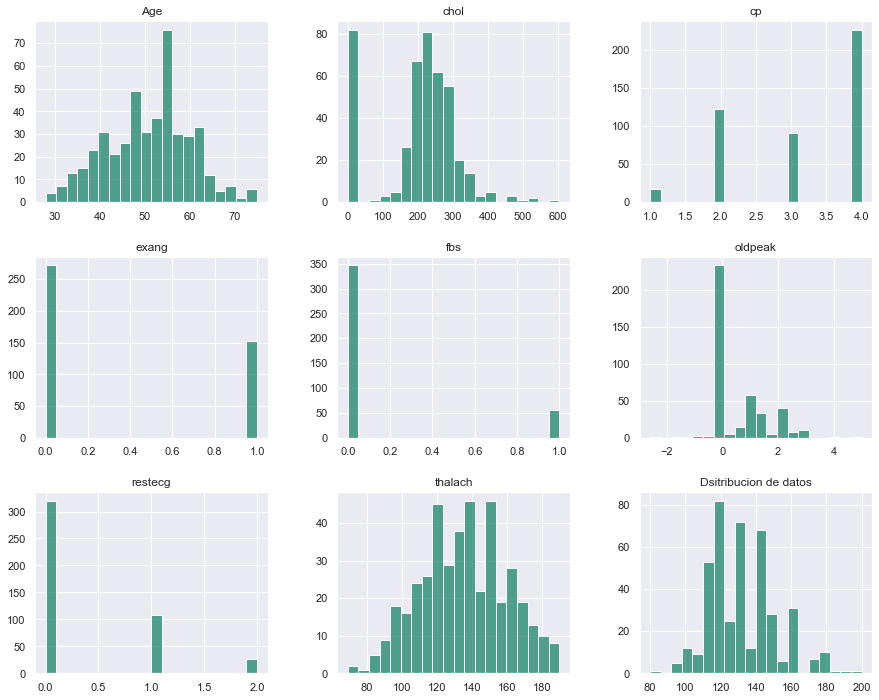

In [7]:
var_numericas.hist(figsize=(15,12), bins = 20, color="#007959AA" )
plt.title("Dsitribucion de datos")
plt.show()

# Tortas

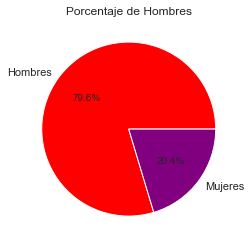

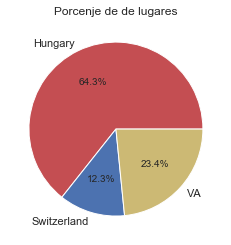

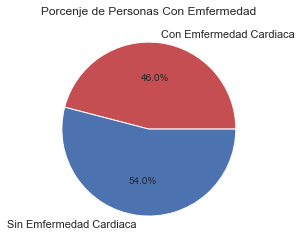

In [18]:
h = categoricas['Sex'][categoricas['Sex'] == 1].count()
m = categoricas['Sex'][categoricas['Sex']== 0].count()
Sex = [h,m]
plt.pie(ca, colors=['red','purple',], labels=['Hombres', 'Mujeres'],autopct='%1.1f%%')
plt.title('Porcentaje de Hombres')

plt.show()

lh = categoricas['Place'][categoricas['Place'] == 'Hungary'].count()
ls = categoricas['Place'][categoricas['Place'] == 'Switzerland'].count()
lv = categoricas['Place'][categoricas['Place'] == 'VA'].count()

pls = [lh,ls, lv]
plt.pie(pls, colors='rby', labels=['Hungary', 'Switzerland', 'VA'],autopct='%1.1f%%')
plt.title('Porcenje de de lugares')

plt.show()

e = categoricas['num'][categoricas['num'] == 1].count()
e1 = categoricas['num'][categoricas['num'] == 0].count()
em = [e, e1]

plt.pie(em, colors='rby', labels=['Con Emfermedad Cardiaca', 'Sin Emfermedad Cardiaca'],autopct='%1.1f%%')
plt.title('Porcenje de Personas Con Emfermedad')

plt.show()


# Depuración de datos

In [25]:
# Tomanos los Dataframes Corazon (conjunto de entremaniento), prueba (conjunto de prueba)
# Formateamos los datos que esten vacios en el conjunto de entrenamiento y prueba
# hacemos copias para para entrenar el arbol de desición tomando como valor de predición
# la colomuna Num como variables objetiva para realizar la clasificación de la enfermedad cardiaca

# elimanamos los registros vacio o nulos de los conjuntos de pruebas

from sklearn.model_selection import train_test_split

Corazon = Corazon.dropna()


Corazon['Place'][Corazon['Place'] == 'Hungary'] = 0
Corazon['Place'][Corazon['Place'] == 'Switzerland'] = 1
Corazon['Place'][Corazon['Place'] == 'VA'] = 2

# División de datos

In [26]:
#se Crea los areglos nummpy objetivo (unidimensional) y atributos(multidimensional).

objetivo = Corazon['num'].values
atributos = Corazon[['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak', 'Place']].values

#se divide en 80% para entrenamiento y 20% para prueba 
trainX, testX, trainY, testY = train_test_split(atributos,objetivo, test_size = 0.2 )

# Primera predicion  con sobre ajuste

Aqui hacemos una primera predicción con árboles de desición con sobre ajuste el resultado es que da un 100%  con respecto
a la variable num

In [8]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(atributos, objetivo)

print(arbol.score(atributos, objetivo))
print(arbol.feature_importances_)

1.0
[0.11498536 0.01726004 0.09582955 0.13602253 0.14617968 0.03110834
 0.02973235 0.12540254 0.24638034 0.05144994 0.00564934]


# Segunda predicción sin sobre ajuste

Aqui hacemos una segunda predicción con árboles de desición sin sobre ajuste el resultado varia en porcentaje con respecto a la variable num

In [11]:
arbol_2 =  tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 20, random_state = 1)
arbol_2 = arbol_2.fit(atributos, objetivo)

print(arbol_2.score(atributos, objetivo))

0.8391812865497076


# Prediccion datos de conjunto de entremaniento y prueba

In [27]:
arbol_3 =  tree.DecisionTreeClassifier(max_depth = 8, min_samples_split = 8 , random_state = 1)
arbol_3 = arbol_3.fit(trainX, trainY)

# Score del conjunto de entrenamiento.
resultado1 = arbol_3.score(trainX, trainY)
print("Resultado conjunto de entrenamiento %.2f%%" % (resultado1 * 100.0))
# Score del conjunto de Pruebas
resultado2 = arbol_3.score( testX, testY)
print("Resultado del conjunto de prueba %.2f%%" % (resultado2 * 100.0))


Resultado conjunto de entrenamiento 92.31%
Resultado del conjunto de prueba 66.67%


# Modelo Naive Bayes

In [29]:
bayes = gnb.fit(trainX, trainY)

## Score del conjunto de entremaniento.
score_bayes1 = bayes.score(trainX, trainY)
print("Resultado conjunto de entrenamiento %.2f%%" % (score_bayes1 * 100.0))
# Score del conjunto de prueba
score_bayes2 = bayes.score(testX, testY)
print("Resultado del conjunto de prueba %.2f%%" % (score_bayes2 * 100.0))

Resultado conjunto de entrenamiento 79.49%
Resultado del conjunto de prueba 72.46%


# Redes Neuronales

# Red Neuronal con Sklearn

In [31]:
scaler = StandardScaler()
#hacemos una copia de trianX y testX 
train_x = trainX.copy()
test_x = testX.copy()

scaler.fit(trainX)
# aplicamos la transformaicon a trian_x y test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

neuronal_sk = MLPClassifier(hidden_layer_sizes=(10,2,3), activation='relu', solver='lbfgs', max_iter=200, random_state=10)

neuronal_sk.fit(train_x, trainY) 

print("entrenamiento")
print(neuronal_sk.score(train_x, trainY))

print("prueba")
print(neuronal_sk.score(test_x, testY))



entrenamiento
0.9743589743589743
prueba
0.6521739130434783


#  Red neuronal con Keras

In [31]:
# Creamos nuestra red neuronal
red_keras = Sequential()
# se crea la primera capa con 11 entradas y 12 neuronas en la capa oculta
red_keras.add(Dense(12, input_dim=11, activation='relu'))
# segunda capa con 8 neuronas
red_keras.add(Dense(8, activation='relu'))
# capa de salida con 1 sola neurona
red_keras.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
red_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0913 19:22:58.870009  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 19:22:59.457493  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 19:22:59.574920  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 19:22:59.773247  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0913 19:22:59.836150  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anac

# Ajuste del modelo keras 

In [32]:
# ajeuste del modelo
red_keras.fit(trainX, trainY, epochs=20, batch_size=5)

# Evaluación del modelo para entrenamiento
score = red_keras.evaluate(trainX, trainY)
print("\n redes entremaniento keras %s: %.2f%%" % (red_keras.metrics_names[1], score[1]*100))

# Calcular predicción
prediccion = red_keras.predict(trainX)
redon = [round(x[0]) for x in prediccion]
print(redon)

W0913 19:23:06.583542  6808 deprecation_wrapper.py:119] From C:\Users\DAVIS\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
273/273 [==============================] - 4s 14ms/step - loss: 7.2030 - acc: 0.5531
Epoch 2/20
273/273 [==============================] - 0s 594us/step - loss: 7.2030 - acc: 0.5531
Epoch 3/20
273/273 [==============================] - 0s 572us/step - loss: 7.2030 - acc: 0.5531
Epoch 4/20
273/273 [==============================] - 0s 546us/step - loss: 7.2030 - acc: 0.5531
Epoch 5/20
273/273 [==============================] - 0s 550us/step - loss: 7.2030 - acc: 0.5531
Epoch 6/20
273/273 [==============================] - 0s 586us/step - loss: 7.2030 - acc: 0.5531
Epoch 7/20
273/273 [==============================] - 0s 561us/step - loss: 7.2030 - acc: 0.5531
Epoch 8/20
273/273 [==============================] - 0s 546us/step - loss: 7.2030 - acc: 0.5531
Epoch 9/20
273/273 [==============================] - 0s 553us/step - loss: 7.2030 - acc: 0.5531
Epoch 10/20
273/273 [==============================] - 0s 553us/step - loss: 7.2030 - acc: 0.5531
Epoch 11/20
273/273 [=========

In [33]:
# Creamos nuestra red neuronal
red_keras1 = Sequential()

# se crea la primera capa con 8 entradas y 12 neuronas en la capa oculta
red_keras1.add(Dense(12, input_dim=11, activation='relu'))

# segunda capa con 8 neuronas
red_keras1.add(Dense(8, activation='relu'))

# capa de salida con 1 sola neurona
red_keras1.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
red_keras1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ajeuste del modelo
red_keras1.fit(trainX, trainY, epochs=20,batch_size=10)

# Evaluación del modelo para prueba
score = red_keras1.evaluate(testX, testY)
print("\n red Prueba keras %s: %.2f%%" % (red_keras1.metrics_names[1], score[1]*100))

# Calcular predicción
prediccion = red_keras1.predict(testX)
redon = [round(x[0]) for x in prediccion]
print(redon)

Epoch 1/20
273/273 [==============================] - 2s 9ms/step - loss: 6.4660 - acc: 0.5641
Epoch 2/20
273/273 [==============================] - 0s 363us/step - loss: 6.0362 - acc: 0.5714
Epoch 3/20
273/273 [==============================] - 0s 330us/step - loss: 4.0916 - acc: 0.4908
Epoch 4/20
273/273 [==============================] - 0s 421us/step - loss: 1.6851 - acc: 0.3993
Epoch 5/20
273/273 [==============================] - 0s 330us/step - loss: 0.9424 - acc: 0.4176
Epoch 6/20
273/273 [==============================] - 0s 330us/step - loss: 0.7852 - acc: 0.4286
Epoch 7/20
273/273 [==============================] - 0s 323us/step - loss: 0.7059 - acc: 0.4212
Epoch 8/20
273/273 [==============================] - ETA: 0s - loss: 0.6685 - acc: 0.570 - 0s 337us/step - loss: 0.6750 - acc: 0.6044
Epoch 9/20
273/273 [==============================] - 0s 348us/step - loss: 0.6688 - acc: 0.6227
Epoch 10/20
273/273 [==============================] - 0s 326us/step - loss: 0.6611 - acc: 

# Matrices que Confusion 

In [199]:
# Matrix de confusion para arboles de desición

#matrix de confusión conjunto de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(arbol_3.predict(trainX), trainY))

#matrix de confusión conjunto de prueba
print("Conjunto de prueba")
print(confusion_matrix(arbol_3.predict(testX), testY))


Conjunto de entrenamiento
[[150   3]
 [  6 114]]
Conjunto de prueba
[[27 13]
 [10 19]]


In [200]:
# Matrix de confusion de Bayes

# matrix de confusion de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(bayes.predict(trainX), trainY))

# matrix de consfusion de prueba
print("Conjunto de prueba")
print(confusion_matrix(bayes.predict(testX), testY))

Conjunto de entrenamiento
[[124  23]
 [ 32  94]]
Conjunto de prueba
[[28  6]
 [ 9 26]]


In [202]:
# Matrix de confusion de redes neuronales sklearn

# matrix de confusion de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(neuronal_sk.predict(trainX), trainY))

# matrix de consfusion de prueba
print("Conjunto de prueba")
print(confusion_matrix(neuronal_sk.predict(testX), testY))

Conjunto de entrenamiento
[[156 117]
 [  0   0]]
Conjunto de prueba
[[37 32]
 [ 0  0]]
